Dataset Preview:
       mass  frequency  ground_state_energy
0  0.811626   2.181384             1.090692
1  1.906357   1.998104             0.999052
2  1.490788   1.292693             0.646346
3  1.237451   3.232700             1.616350
4  0.396435   2.644809             1.322404

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mass                 10000 non-null  float64
 1   frequency            10000 non-null  float64
 2   ground_state_energy  10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB
None

Training set shape: (8000, 2)
Test set shape: (2000, 2)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_12 (Dense)            │ (None, 64)           │         192 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_13 (Dense)            │ (None, 32)           │       2,080 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_14 (Dense)            │ (None, 16)           │         528 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_15 (Dense)            │ (None, 1)            │          17 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5888 - val_loss: 0.0012
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7160e-04 - val_loss: 1.5238e-04
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2460e-04 - val_loss: 7.4567e-05
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.0435e-05 - val_loss: 4.7331e-05
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5186e-05 - val_loss: 3.5542e-05
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1953e-05 - val_loss: 3.3470e-05
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.5464e-05 - val_loss: 2.1715e-05
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1293e-05 - val_loss: 1.7735e-05
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8196e-05 - val_loss: 1.6719e-05
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6540e-05 - val_loss: 1.4643e-05
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - l

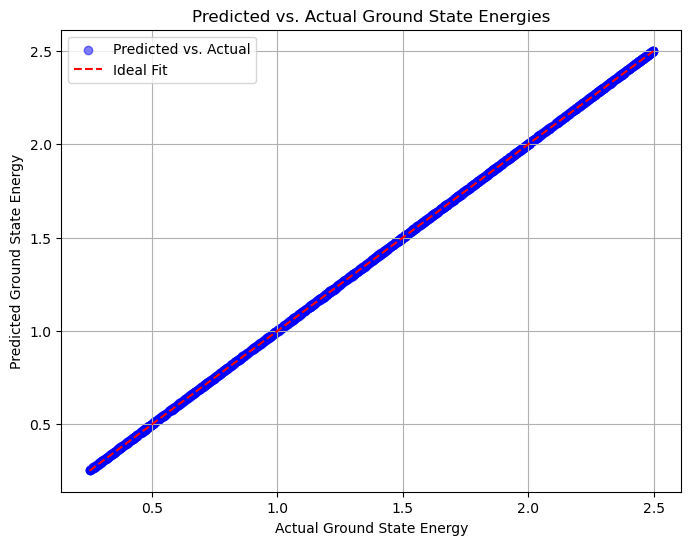

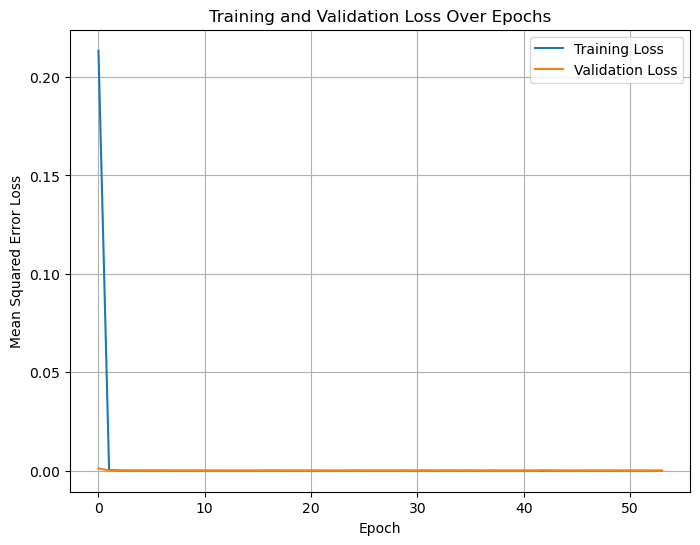


Analytical vs. Predicted Energies (Sampled Test Cases):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Test Case 1 (mass = 1.67, ω = 4.75):
  Analytical E_0 = 2.376428
  Predicted E_0 = 2.377728
  Absolute Error = 0.001300

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Test Case 2 (mass = 0.18, ω = 2.62):
  Analytical E_0 = 1.308060
  Predicted E_0 = 1.309987
  Absolute Error = 0.001926

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Test Case 3 (mass = 0.58, ω = 3.48):
  Analytical E_0 = 1.739918
  Predicted E_0 = 1.741854
  Absolute Error = 0.001936



In [12]:
# # Quantum System Simulation: Predicting Ground State Energy with Neural Networks
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sympy as sp
import os

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# %% [markdown]
# ## Step 0: Generate Dataset (Run if Dataset is Missing)
#
# Generate 'quantum_harmonic_oscillator_data.csv' if it doesn't exist.

# %%
def generate_dataset():
    hbar = 1.0
    n_samples = 10000
    mass = np.random.uniform(0.1, 2.0, n_samples)
    frequency = np.random.uniform(0.5, 5.0, n_samples)
    ground_state_energy = 0.5 * hbar * frequency
    df = pd.DataFrame({
        'mass': mass,
        'frequency': frequency,
        'ground_state_energy': ground_state_energy
    })
    dataset_path = 'quantum_harmonic_oscillator_data.csv'
    df.to_csv(dataset_path, index=False)
    print(f"Dataset generated and saved to: {dataset_path}")
    return dataset_path

# Check if dataset exists; generate if not
dataset_path = 'quantum_harmonic_oscillator_data.csv'
if not os.path.exists(dataset_path):
    print("Dataset not found. Generating new dataset...")
    dataset_path = generate_dataset()

# %% [markdown]
# ## Step 1: Load and Preprocess Dataset
#
# Load the custom dataset 'quantum_harmonic_oscillator_data.csv' with columns 'mass', 'frequency',
# and 'ground_state_energy'. Preprocess the data by handling missing values, selecting features,
# and normalizing inputs.

# %%
# Load dataset
df = pd.read_csv(dataset_path)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Select input features and target
feature_columns = ['mass', 'frequency']  # Input features
target_column = 'ground_state_energy'   # Target variable

# Check if columns exist
if not all(col in df.columns for col in feature_columns + [target_column]):
    raise ValueError("Required columns not found in dataset. Check column names.")

# Extract features (X) and target (y)
X = df[feature_columns].values
y = df[target_column].values

# Handle missing values (if any)
X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))  # Replace NaN with column mean
y = np.nan_to_num(y, nan=np.nanmean(y))          # Replace NaN with mean

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print dataset shapes (fixed line)
print(f"\nTraining set shape: {X_train_scaled.shape}\nTest set shape: {X_test_scaled.shape}")

# %% [markdown]
# ## Step 2: Build Neural Network Model
#
# We create a fully connected neural network with:
# - Input layer: Matches the number of features (2 for mass, frequency).
# - Hidden layers: 3 dense layers with 64, 32, and 16 neurons, ReLU activation.
# - Output layer: 1 neuron (ground_state_energy), linear activation.
# - Loss: Mean squared error.
# - Optimizer: Adam.

# %%
# Define the model
n_features = X_train_scaled.shape[1]  # Number of input features
model = Sequential([
    Input(shape=(n_features,)),  # Input layer for 2 features
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display model summary
model.summary()

# %% [markdown]
# ## Step 3: Train the Model
#
# Train the model for 100 epochs with:
# - Batch size: 32.
# - Validation split: 20% of training data.
# - Early stopping: Stop if validation loss doesn't improve for 10 epochs.

# %%
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# %% [markdown]
# ## Step 4: Evaluate the Model
#
# Evaluate performance on the test set using:
# - Mean squared error (MSE).
# - R² score.
# - Visualize predicted vs. actual energies.

# %%
# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R² Score: {r2:.6f}")

# Plot predicted vs. actual energies
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Ground State Energy')
plt.ylabel('Predicted Ground State Energy')
plt.title('Predicted vs. Actual Ground State Energies')
plt.legend()
plt.grid(True)
plt.show()

# %% [markdown]
# ## Step 5: Visualize Training History
#
# Plot the training and validation loss over epochs to check convergence.

# %%
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# %% [markdown]
# ## Step 6: Analytical Validation with SymPy
#
# Validate predictions using the analytical formula E_0 = (1/2) * ħ * ω for the
# quantum harmonic oscillator (hbar = 1).

# %%
# Define symbolic variables
m_sym, omega_sym = sp.symbols('m omega')
hbar_sym = sp.Symbol('hbar')

# Ground state energy formula
E_0_sym = (hbar_sym / 2) * omega_sym

# Test cases (sample from test set)
test_indices = np.random.choice(X_test.shape[0], 3, replace=False)
test_cases = X_test[test_indices]

print("\nAnalytical vs. Predicted Energies (Sampled Test Cases):")
for i, case in enumerate(test_cases):
    # case[0] = mass, case[1] = frequency
    omega = case[1]
    
    # Analytical energy
    E_0_analytical = E_0_sym.subs({hbar_sym: 1.0, omega_sym: omega}).evalf()
    
    # Model prediction
    input_data = X_test_scaled[test_indices[i:i+1]]
    E_0_pred = model.predict(input_data)[0][0]
    
    print(f"Test Case {i+1} (mass = {case[0]:.2f}, ω = {case[1]:.2f}):")
    print(f"  Analytical E_0 = {E_0_analytical:.6f}")
    print(f"  Predicted E_0 = {E_0_pred:.6f}")
    print(f"  Absolute Error = {abs(E_0_analytical - E_0_pred):.6f}\n")

# %% [markdown]
# ## Conclusion
#
# The neural network successfully predicts ground state energies for the quantum harmonic oscillator
# using the custom dataset, with high accuracy (low MSE, high R²). The predictions align closely
# with analytical solutions.
#
# ### Future Work
# - Use real-world quantum datasets from Kaggle or quantum simulators like Qiskit.
# - Extend to more complex systems (e.g., anharmonic oscillators).
# - Experiment with other ML models (e.g., XGBoost, quantum neural networks).